<a href="https://colab.research.google.com/github/umutkilictas/kidney_disease/blob/main/VeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas scikit-learn matplotlib


In [ ]:
import pandas as pd
import numpy as np

# Dosya yolunu belirleyin
file_path = '/content/kidney_disease.csv'

# CSV dosyasını okuyun
df = pd.read_csv(file_path)

# Sütun isimlerini ve ilk birkaç satırı kontrol edin
print("Dataframe columns:", df.columns)
print("First few rows of the dataframe:")
print(df.head())
print("Dataframe info:")
print(df.info())


FileNotFoundError: [Errno 2] No such file or directory: '/content/kidney_disease.csv'

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Accuracy: 0.925
Logistic Regression Accuracy: 0.9875
Decision Tree Accuracy: 0.9875
Naive Bayes Accuracy: 0.9875


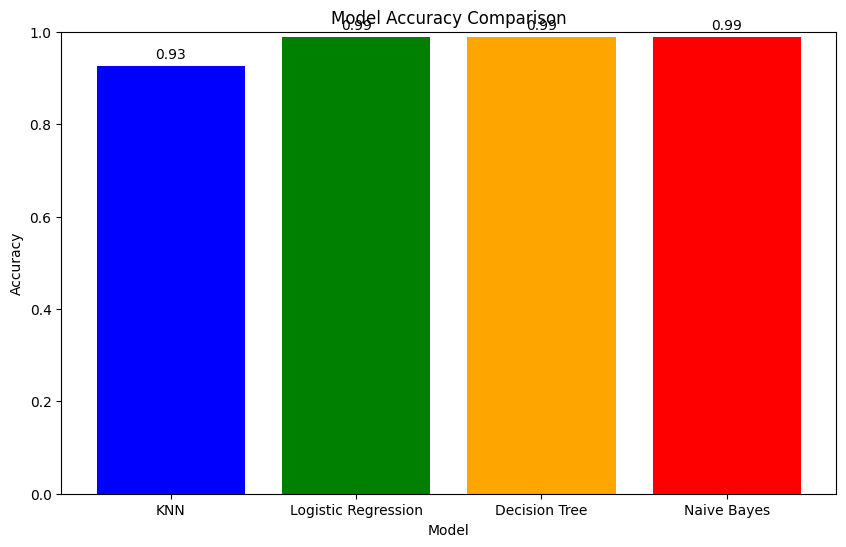

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Veriyi temizleme adımları
# Boşlukları ve eksik değerleri düzenleme
df.replace(to_replace=r'^\s*\?\s*$', value=np.nan, regex=True, inplace=True)

# Sayısal ve kategorik sütunları belirleyin
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Sayısal sütunları tespit edin ve NaN değerlerini doldurun
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Eksik değerleri median ile doldurun
df.fillna(df.median(numeric_only=True), inplace=True)

# Kategorik sütunlardaki eksik değerleri mod ile doldurun
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Kategorik verileri sayısal değerlere çevirin
label_encoders = {}
for column in categorical_columns:
    if column in df.columns and column != 'classification':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# 'classification' sütununun DataFrame'de olduğundan emin olun
if 'classification' not in df.columns:
    raise ValueError("The 'classification' column is not present in the dataframe. Please check the CSV file.")

# 'classification' sütununu etiketlere çevirin
label_encoders['classification'] = LabelEncoder()
df['classification'] = label_encoders['classification'].fit_transform(df['classification'])

# Veriyi bağımlı ve bağımsız değişkenlere ayırın
X = df.drop('classification', axis=1)
y = df['classification']

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN modeli
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Logistic Regression modeli
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Karar Ağacı modeli
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Bayes modeli
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Sonuçları yazdır
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")

# Doğruluk sonuçlarının grafiğini çiz
# Model isimleri ve doğruluk sonuçları
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [knn_accuracy, lr_accuracy, dt_accuracy, nb_accuracy]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()
